# Experiment Script

## Experiment 1: Accuracy test

### 將翰林題庫由 word 轉 csv

In [1]:
import os
def list_files(directory):
    ret = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            #print(os.path.join(root, file))
            ret.append(os.path.join(root, file))
    return ret
list_files('E:\\HanlinMath\\ElementarySchool\\grade1_1')

['E:\\HanlinMath\\ElementarySchool\\grade1_1\\3_1.docx',
 'E:\\HanlinMath\\ElementarySchool\\grade1_1\\3_2.docx',
 'E:\\HanlinMath\\ElementarySchool\\grade1_1\\3_3.docx',
 'E:\\HanlinMath\\ElementarySchool\\grade1_1\\4_4.docx',
 'E:\\HanlinMath\\ElementarySchool\\grade1_1\\6_1.docx',
 'E:\\HanlinMath\\ElementarySchool\\grade1_1\\6_3.docx',
 'E:\\HanlinMath\\ElementarySchool\\grade1_1\\7_1.docx',
 'E:\\HanlinMath\\ElementarySchool\\grade1_1\\7_2.docx',
 'E:\\HanlinMath\\ElementarySchool\\grade1_1\\7_3.docx',
 'E:\\HanlinMath\\ElementarySchool\\grade1_1\\7_4.docx',
 'E:\\HanlinMath\\ElementarySchool\\grade1_1\\8_2.docx',
 'E:\\HanlinMath\\ElementarySchool\\grade1_1\\8_4.docx',
 'E:\\HanlinMath\\ElementarySchool\\grade1_1\\9_1.docx']

#### docx -> dict

In [2]:
from docx import Document

def generate_dataset(file_path):
    print(file_path)
    doc = Document(file_path)
    #print('段落數量： ', len(doc.paragraphs))
    idx = 0
    dataset = []
    chapter = doc.paragraphs[2].text
    while idx < len(doc.paragraphs):
        
        if doc.paragraphs[idx].text[:3] != "編號：": 
            idx += 1
            continue
        question = {}
        input, output, difficulty = "", "", doc.paragraphs[idx].text.split("難易度：")[-1]
        idx += 1
        while idx < len(doc.paragraphs) and doc.paragraphs[idx].text[:3] != "答案：":
            input += doc.paragraphs[idx].text
            idx += 1
        while idx < len(doc.paragraphs) and doc.paragraphs[idx].text[:5] != "認知向度：":
            output += doc.paragraphs[idx].text + " "
            idx += 1
        question["input"] = input
        question["output"] = output
        question["difficulty"] = difficulty
        question["chapter"] = chapter
        dataset.append(question)
        
    return dataset

generate_dataset("E:\\HanlinMath\\ElementarySchool\\grade1_2\\1_1.docx")

E:\HanlinMath\ElementarySchool\grade1_2\1_1.docx


[{'input': '(   )算算看，哪一個答案不是\u300015？\u3000(Ａ)\u30009＋6\u3000(Ｂ)\u30008＋7\u3000(Ｃ)\u30006＋8。',
  'output': '答案：(Ｃ) 解析：(Ａ)\u30009＋6＝15；(Ｂ)\u30008＋7＝15；(Ｃ)\u30006＋8＝14 ',
  'difficulty': '中',
  'chapter': '1-1_基本加法'},
 {'input': '(   )包子店上午賣出\u30005\u3000個高麗菜包，下午賣出\u30009\u3000個高麗菜包，包子店共賣出幾個高麗菜包？\u3000(Ａ)\u300012\u3000個\u3000(Ｂ)\u300013\u3000個\u3000(Ｃ)\u300014\u3000個。',
  'output': '答案：(Ｃ) 解析：5＋9＝14 ',
  'difficulty': '易',
  'chapter': '1-1_基本加法'},
 {'input': '(   )籃子裡有\u30005\u3000顆綠球和\u30007\u3000顆黃球，籃子裡共有幾顆球？\u3000(Ａ)\u300013\u3000顆\u3000(Ｂ)\u300012\u3000顆\u3000(Ｃ)\u300011\u3000顆。',
  'output': '答案：(Ｂ) 解析：5＋7＝12 ',
  'difficulty': '易',
  'chapter': '1-1_基本加法'},
 {'input': '(   )操場上原有\u30009\u3000個小朋友，又來\u30006\u3000個小朋友，操場上現在共有幾個小朋友？\u3000(Ａ)\u300015\u3000個\u3000(Ｂ)\u300016\u3000個\u3000(Ｃ)\u300017\u3000個。',
  'output': '答案：(Ａ) 解析：9＋6＝15 ',
  'difficulty': '易',
  'chapter': '1-1_基本加法'},
 {'input': '(   )書桌上有\u300010\u3000本名人傳記和\u30006\u3000本科學小百科，書桌上一共有幾本書？\u3000(Ａ)\u300015\u3000本\u300

#### dict -> csv

In [3]:
import csv
def write_csv(datasets, file_path):
    with open(file_path, 'w+', encoding='utf-8', newline='') as f:
        fieldnames = ['input', 'output', 'difficulty', 'chapter']
        writer = csv.DictWriter(f, fieldnames=fieldnames)
        writer.writeheader()
        for dataset in datasets:
            for data in dataset:
                writer.writerow(data)
    print('Save data in ' + file_path)

In [4]:
file_path = 'E:\\HanlinMath\\ElementarySchool\\grade3_2'
files = list_files(file_path)
datasets = []
for file in files:
    datasets.append(generate_dataset(file))

save_path = 'dataset\\' + file_path.split('\\')[-1] + '.csv'
write_csv(datasets, save_path)

E:\HanlinMath\ElementarySchool\grade3_2\1-1.docx
E:\HanlinMath\ElementarySchool\grade3_2\1-2.docx
E:\HanlinMath\ElementarySchool\grade3_2\2-1.docx
E:\HanlinMath\ElementarySchool\grade3_2\2-2.docx
E:\HanlinMath\ElementarySchool\grade3_2\2-3.docx
E:\HanlinMath\ElementarySchool\grade3_2\2-4.docx
E:\HanlinMath\ElementarySchool\grade3_2\4-1.docx
E:\HanlinMath\ElementarySchool\grade3_2\4-2.docx
E:\HanlinMath\ElementarySchool\grade3_2\5-1.docx
E:\HanlinMath\ElementarySchool\grade3_2\5-2.docx
E:\HanlinMath\ElementarySchool\grade3_2\6-1.docx
E:\HanlinMath\ElementarySchool\grade3_2\6-2.docx
E:\HanlinMath\ElementarySchool\grade3_2\6-3.docx
E:\HanlinMath\ElementarySchool\grade3_2\7-1.docx
E:\HanlinMath\ElementarySchool\grade3_2\7-2.docx
E:\HanlinMath\ElementarySchool\grade3_2\7-3.docx
E:\HanlinMath\ElementarySchool\grade3_2\7-4.docx
E:\HanlinMath\ElementarySchool\grade3_2\8-1.docx
E:\HanlinMath\ElementarySchool\grade3_2\8-2.docx
E:\HanlinMath\ElementarySchool\grade3_2\9-1.docx
E:\HanlinMath\Elemen

### LangSmith Evaluation

In [ ]:
from langsmith import Client
client = Client()
file = "grade2_2"

dataset = client.upload_csv(
    csv_file = f"dataset\\{file}.csv",
    input_keys = ['input', 'chapter', 'difficulty'],
    output_keys = ['output'],
    name = file,
    description = f"Hanlin Math of {file}",
    data_type = "kv"
)

#### old version

In [ ]:
import langsmith
from langchain import smith
from langchain_openai import ChatOpenAI
from src.dependencies.settings import get_settings
from src.service.math_solver import MathSolver

# Define your runnable or chain below.
math_solver = MathSolver(model="gpt-4-1106-preview", temperature=0)

# Define the evaluators to apply
eval_config = smith.RunEvalConfig(
    evaluators=[
        "qa",
        "context_qa",
        "cot_qa",
#        smith.RunEvalConfig.LabeledCriteria("helpfulness"),
#        smith.RunEvalConfig.LabeledCriteria("conciseness")
    ],
    custom_evaluators=[],
    eval_llm = ChatOpenAI(model="gpt-3.5-turbo", 
        temperature=0, 
        openai_api_key=get_settings().gpt_secret_key
    )
)

client = langsmith.Client()

def run(dataset):
    return client.run_on_dataset(
        dataset_name=dataset,
        llm_or_chain_factory=math_solver.agent,
        evaluation=eval_config,
        project_name="QSticker Math APP evaluation",
        concurrency_level=3,
        verbose=True,
    )

c:\Users\123\OneDrive\Documents\GitHub\qsticker_gpt_server\gpt_server\Lib\site-packages\langchain_core\_api\deprecation.py:119: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 0.3.0. Use RunnableSequence, e.g., `prompt | llm` instead.
  warn_deprecated(


#### new version

In [ ]:
from langsmith.evaluation import LangChainStringEvaluator, evaluate
math_solver = MathSolver(model="gpt-4-1106-preview", temperature=0)
eval_llm = ChatOpenAI(model="gpt-3.5-turbo", 
    temperature=0, 
    openai_api_key=get_settings().gpt_secret_key
)
qa_evaluator = LangChainStringEvaluator(
    "qa", 
    config={"llm": eval_llm},
    prepare_data=lambda run, example: {
        "prediction": run.outputs["output"],
        "reference": example.outputs["output"],
        "input": example.inputs["input"],
    }
)  
context_qa_evaluator = LangChainStringEvaluator(
    "context_qa", 
    config={"llm": eval_llm},
    prepare_data=lambda run, example: {
        "prediction": run.outputs["output"],
        "reference": example.outputs["output"],
        "input": example.inputs["input"],
    }
)
cot_qa_evaluator = LangChainStringEvaluator(
    "cot_qa", 
    config={"llm": eval_llm},
    prepare_data=lambda run, example: {
        "prediction": run.outputs["output"],
        "reference": example.outputs["output"],
        "input": example.inputs["input"],
    }
)

def run_evaluate(dataset):
    return evaluate(
        lambda x: math_solver.agent.invoke(x),
        data=dataset,
        evaluators = [qa_evaluator, context_qa_evaluator, cot_qa_evaluator],
        experiment_prefix="Hanlin Math Elementary " + dataset,
        max_concurrency=5,
    )

In [ ]:
#run_evaluate("grade2_1")

### 自訂 Evaluator

In [14]:
import csv
def read_csv(file_path):
    with open(file_path, mode='r', newline='', errors='ignore') as file:
        reader = csv.reader(file)
        data = [row for row in reader if row]
    #print(len(data) - 1, data[:3])
    return data

In [7]:
import csv
def write_result_csv(data, file_path):
    with open(file_path, 'w+', encoding='utf-8', newline='') as f:
        writer = csv.writer(f)
        for row in data:
            writer.writerow(row)
    print('Save data in ' + file_path)

In [25]:
import time
from tqdm.notebook import tqdm
from langchain.callbacks import get_openai_callback
from src.service.math_solver import MathSolver
from src.service.question_evaluator import QuestionEvaluator
from src.service.translator import Translator

math_solver = MathSolver(model="gpt-4o-2024-05-13", temperature=0)
evaluator = QuestionEvaluator(model="gpt-4o-2024-05-13", temperature=0)
translator = Translator(model="gpt-4o-2024-05-13", temperature=0, lang='zh-TW')

def acc_experiment(dataset):
    labels = ['question', 'true_answer', 'difficulty', 'chapter', 'generated_answer', 'ans_tokens', 'ans_cost', 'ans_time', 'qa_evaluate', 'qa_reply', 'cot_evaluate', 'cot_reply', 'tot_tokens', 'tot_cost']
    result = [labels]
    pbar = tqdm(total=len(dataset))
    tot_tokens, tot_cost = 0, 0.
    for question, answer, difficulty, chapter in dataset:
        try:
            with get_openai_callback() as cb:
                start_time = time.time()
                gen_ans = math_solver.agent.invoke({"input": MathSolver.SAQ_prompt(question)})["output"].replace('\n', ' ')
                end_time = time.time()
                ans_tokens, ans_cost = cb.total_tokens, cb.total_cost

                translate_prompt = translator.question_solution_prompt(question, gen_ans)
                gen_ans = translator.llm_translate(translate_prompt)
                qa = evaluator.reply(evaluator.QA_context_prompt(question, answer, gen_ans)).replace('\n', ' ')
                qa_eval = True if 'CORRECT' in qa and 'INCORRECT' not in qa else False
                cot = evaluator.reply(evaluator.cot_context_prompt(question, answer, gen_ans)).replace('\n', ' ')
                cot_eval = True if 'CORRECT' in cot and 'INCORRECT' not in cot else False
                result.append([question, answer, difficulty, chapter, gen_ans, ans_tokens, ans_cost, end_time - start_time, qa_eval, qa, cot_eval, cot, cb.total_tokens, cb.total_cost])
                tot_tokens += cb.total_tokens
                tot_cost += cb.total_cost
        except:
            result.append([question, answer, difficulty, chapter, 'ERROR', 0, 0, 0, False, None, False, None, 0, 0])
        pbar.update(1)

    print('Total tokens: ', tot_tokens, ', total cost: ', tot_cost)
    return result

In [ ]:
target = 'grade6_2'
data = read_csv('dataset/{}.csv'.format(target))
# res = acc_experiment(data[1:])
# write_result_csv(res, 'experiment/{}.csv'.format(target))

### Result

#### Accuracy Table

| 年級_學期 | 錯誤題數 | 總題數 | 答對率 |
| :------: | :------: | :---: | :----: |
| grade1_1 | 4        | 54    | 92.6%  |
| grade1_2 | 6        | 166   | 96.4%  |
| grade2_1 | 21       | 230   | 90.9%  |
| grade2_2 | 20       | 223   | 91.0%  |
| grade3_1 | 24       | 245   | 90.2%  |
| grade3_2 | 16       | 166   | 90.4%  |
| grade4_1 | 12       | 155   | 92.3%  |
| grade4_2 | 43       | 203   | 78.8%  |
| grade5_1 | 50       | 329   | 84.8%  |
| grade5_2 | 25       | 186   | 86.6%  |
| grade6_1 | 62       | 331   | 81.3%  |
| grade6_2 | 19       | 86    | 77.9%  |

#### 總計
錯誤題數: 302,  總題數: 2374, 答對率: 87.3 % 


In [7]:
# question, true_answer, difficulty, chapter, generated_answer, ans_tokens, ans_cost, ans_time, qa_evaluate, qa_reply, cot_evaluate, cot_reply, tot_tokens, tot_cost
def parse_data(data):
    ret = {
        'question_num': 0,
        'easy_num': 0,
        'medium_num': 0,
        'hard_num': 0,
        'correct': 0,
        'easy_correct': 0,
        'medium_correct': 0,
        'hard_correct': 0,
        'qa_correct': 0,
        'cot_correct': 0,
        'error': 0,
        'sum_ans_token': 0.,
        'sum_ans_cost': 0.,
        'sum_ans_time': 0.,
        'sum_tot_cost': 0.,
    }

    for question, true_answer, difficulty, chapter, generated_answer, ans_tokens, ans_cost, ans_time, qa_evaluate, qa_reply, cot_evaluate, cot_reply, tot_tokens, tot_cost in data:
        ret['question_num'] += 1
        if difficulty == '易': ret['easy_num'] += 1
        elif difficulty == '中': ret['medium_num'] += 1
        elif difficulty == '難': ret['hard_num'] += 1
        if qa_evaluate == 'True' and cot_evaluate == 'True': 
            ret['correct'] += 1
            if difficulty == '易': ret['easy_correct'] += 1
            elif difficulty == '中': ret['medium_correct'] += 1
            elif difficulty == '難': ret['hard_correct'] += 1
            ret['sum_ans_token'] += int(ans_tokens)
            ret['sum_ans_cost'] += float(ans_cost)
            ret['sum_ans_time'] += float(ans_time)
            ret['sum_tot_cost'] += float(tot_cost)
        if qa_evaluate == 'True': ret['qa_correct'] += 1
        if cot_evaluate == 'True': ret['cot_correct'] += 1
        if generated_answer == 'ERROR': ret['error'] += 1
        
        
    return ret

In [8]:
dmap = {}
for grade in range(1, 7):
    for sem in range(1, 3):
        target = f'grade{grade}_{sem}'.format(grade=grade, sem=sem)
        data = read_csv('experiment/accuracy/{}.csv'.format(target))
        dmap[target] = parse_data(data[1:])

for k, v in dmap.items():
    print(k)
    print(v)     

grade1_1
{'question_num': 54, 'easy_num': 18, 'medium_num': 25, 'hard_num': 11, 'correct': 52, 'easy_correct': 18, 'medium_correct': 25, 'hard_correct': 9, 'qa_correct': 52, 'cot_correct': 52, 'error': 2, 'sum_ans_token': 62283.0, 'sum_ans_cost': 0.4204749999999999, 'sum_ans_time': 1385.7584924697876, 'sum_tot_cost': 0.7673849999999999}
grade1_2
{'question_num': 166, 'easy_num': 43, 'medium_num': 104, 'hard_num': 19, 'correct': 162, 'easy_correct': 42, 'medium_correct': 102, 'hard_correct': 18, 'qa_correct': 162, 'cot_correct': 162, 'error': 2, 'sum_ans_token': 201248.0, 'sum_ans_cost': 1.3119800000000001, 'sum_ans_time': 4072.006889820099, 'sum_tot_cost': 2.4454249999999997}
grade2_1
{'question_num': 230, 'easy_num': 33, 'medium_num': 170, 'hard_num': 27, 'correct': 209, 'easy_correct': 30, 'medium_correct': 157, 'hard_correct': 22, 'qa_correct': 209, 'cot_correct': 212, 'error': 7, 'sum_ans_token': 275187.0, 'sum_ans_cost': 1.8833650000000002, 'sum_ans_time': 7708.118501424789, 'sum_

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def acc_plot(dmap):
    acc, easy_acc, medium_acc, hard_acc, bins = [], [], [], [], []
    tot_num, easy_num, medium_num, hard_num = [], [], [], []
    ac_num, ec_num, mc_num, hc_num = [], [], [], []
    ans_tok, ans_cost, ans_time, tot_cost = 0., 0., 0., 0.
    for grade in range(1, 7):
        for sem in range(1, 3):
            target = f'grade{grade}_{sem}'.format(grade=grade, sem=sem)
            bins.append(target)
            ac_num.append(dmap[target]['correct'])
            acc.append(100. * dmap[target]['correct'] / dmap[target]['question_num'])
            tot_num.append(dmap[target]['question_num'])
            ec_num.append(dmap[target]['easy_correct'])
            easy_acc.append(100. * dmap[target]['easy_correct'] / dmap[target]['easy_num'])
            easy_num.append(dmap[target]['easy_num'])
            mc_num.append(dmap[target]['medium_correct'])
            medium_acc.append(100. * dmap[target]['medium_correct'] / dmap[target]['medium_num'])
            medium_num.append(dmap[target]['medium_num'])
            hc_num.append(dmap[target]['hard_correct'])
            hard_acc.append(100. * dmap[target]['hard_correct'] / dmap[target]['hard_num'])
            hard_num.append(dmap[target]['hard_num'])

            ans_tok += dmap[target]['sum_ans_token']
            ans_cost += dmap[target]['sum_ans_cost']
            ans_time += dmap[target]['sum_ans_time']
            tot_cost += dmap[target]['sum_tot_cost']
    
    print('Total Number: ', sum(tot_num), ', Easy: ', sum(easy_num), ', Medium: ', sum(medium_num), ', Hard: ', sum(hard_num))
    print('Total Correct: ', sum(ac_num), ', Easy: ', sum(ec_num), ', Medium: ', sum(mc_num), ', Hard: ', sum(hc_num))
    print('Total Accuracy: ', sum(ac_num) / sum(tot_num), ', Easy: ', sum(ec_num) / sum(easy_num), ', Medium: ', sum(mc_num) / sum(medium_num), ', Hard: ', sum(hc_num) / sum(hard_num))
    print('Average Token: ', ans_tok / sum(ac_num), ', Average Cost: ', ans_cost / sum(ac_num), ', Average Time: ', ans_time / sum(ac_num), ', Total Cost: ', tot_cost / sum(ac_num))
    print('Sum Token: ', ans_tok, ', Sum Cost: ', ans_cost, ', Sum Time: ', ans_time, ', Sum Total Cost: ', tot_cost)
    

    index = np.arange(len(acc))
    width, d = 0.15, 0.03

    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax1.bar(index, tot_num, width, label='Question Number', color='tab:blue', align='edge', alpha=0.5)
    ax1.bar(index, ac_num, width, color='tab:blue', align='edge', alpha=0.7)

    ax1.bar(index + (width + d), easy_num, width, label='Easy Number', color='tab:green', align='edge', alpha=0.5)
    ax1.bar(index + (width + d), ec_num, width, color='tab:green', align='edge', alpha=0.7)
    
    ax1.bar(index + 2 * (width + d), medium_num, width, label='Medium Number', color='orange', align='edge', alpha=0.5)
    ax1.bar(index + 2 * (width + d), mc_num, width, color='orange', align='edge', alpha=0.7)
    
    ax1.bar(index + 3 * (width + d), hard_num, width, label='Hard Number', color='tab:red', align='edge', alpha=0.5)
    ax1.bar(index + 3 * (width + d), hc_num, width, color='tab:red', align='edge', alpha=0.7)
    
    ax1.set_xlabel('Grade / Semester')
    ax1.set_xticks(index + 0.3, bins, rotation=45, ha='right')
    ax1.set_ylabel('Number')

    ax1.legend(ncol=4, loc='upper center', bbox_to_anchor=(0.5, 1.1))

    ax2 = ax1.twinx()
    ax2.set_ylabel('Accuracy (%)', rotation=270)
    ax2.set_ylim(0, 110)
    ax2.plot(index + 1.5 * (width + d), acc, 's-', label='Question Accuracy', color='tab:blue')
    ax2.plot(index + 1.5 * (width + d), easy_acc, 's-', label='Easy Accuracy', color='tab:green')
    ax2.plot(index + 1.5 * (width + d), medium_acc, 's-', label='Medium Accuracy', color='orange')
    ax2.plot(index + 1.5 * (width + d), hard_acc, 's-', label='Hard Accuracy', color='tab:red')
    ax2.legend(ncol=4, loc='upper center', bbox_to_anchor=(0.5, 1.2))

    fig.tight_layout()

    plt.show()

    plt.figure()

Total Number:  2374 , Easy:  856 , Medium:  1268 , Hard:  250
Total Correct:  2073 , Easy:  774 , Medium:  1114 , Hard:  185
Total Accuracy:  0.8732097725358046 , Easy:  0.9042056074766355 , Medium:  0.8785488958990536 , Hard:  0.74
Average Token:  1430.8567293777135 , Average Cost:  0.009977419199228172 , Average Time:  34.12757241938693 , Total Cost:  0.018866295224312588
Sum Token:  2966166.0 , Sum Cost:  20.68319 , Sum Time:  70746.4576253891 , Sum Total Cost:  39.109829999999995


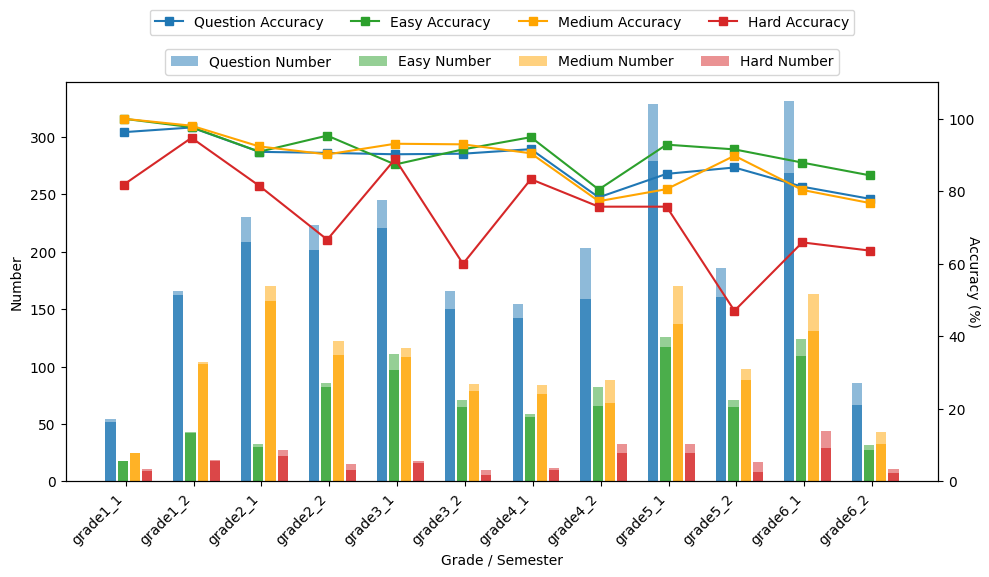

<Figure size 640x480 with 0 Axes>

In [12]:
acc_plot(dmap)

## Experiment 2: Created New Questions

In [169]:
import random
def select_questions(dataset, number):
    valid = []
    for data in dataset:
        if data[8] == 'True' and data[10] == 'True':
            valid.append((data[0], data[4]))
    return random.sample(valid, number)

In [170]:
import time
from langchain.callbacks import get_openai_callback
from src.service.math_solver import MathSolver
from src.service.question_evaluator import QuestionEvaluator
from src.service.translator import Translator
from src.service.question_generator import QuestionGenerator

generator = QuestionGenerator(model="gpt-4o-2024-05-13", temperature=1.)
math_solver = MathSolver(model="gpt-4o-2024-05-13", temperature=0.)
evaluator = QuestionEvaluator(model="gpt-4o-2024-05-13", temperature=0.)
translator = Translator(model="gpt-4o-2024-05-13", temperature=0., lang='zh-TW')

def generate_solve_evaluate(question, solution, limit):
    generate_time, tokens, cost = 0, 0, 0
    result = None
    
    with get_openai_callback() as cb:
        start_time = time.time()
        while generate_time < limit:
            generate_time += 1
            try:
                # generating
                question_prompt = generator.question_generation_prompt(question, solution)
                new_question = generator.reply(question_prompt)
                translate_prompt = translator.question_prompt(new_question)
                new_question = translator.llm_translate(translate_prompt)

                # solving
                new_solution = math_solver.agent.invoke({"input": MathSolver.SAQ_prompt(new_question)})["output"].replace('\n', ' ')
                translate_prompt = translator.question_solution_prompt(new_question, new_solution)
                new_solution = translator.llm_translate(translate_prompt)
                
                # evaluating
                qa = evaluator.reply(evaluator.QA_evaluation_prompt(new_question, new_solution)).replace('\n', ' ')
                qa_eval = True if 'CORRECT' in qa and 'INCORRECT' not in qa else False

                cot = evaluator.reply(evaluator.cot_evaluation_prompt(new_question, new_solution)).replace('\n', ' ')
                cot_eval = True if 'CORRECT' in cot and 'INCORRECT' not in cot else False

                if qa_eval and cot_eval:
                    end_time = time.time()
                    result = [question, solution, new_question, new_solution, end_time - start_time, generate_time, qa_eval, qa, cot_eval, cot, cb.total_tokens, cb.total_cost]
                    break
            
            except:
                continue

        tokens, cost = cb.total_tokens, cb.total_cost
    
    if not result:
        end_time = time.time()
        result = [question, solution, 'ERROR', 'ERROR', end_time - start_time, generate_time, False, 'ERROR', False, 'ERROR', tokens, cost]
        
    return result

c:\Users\123\OneDrive\Documents\GitHub\qsticker_gpt_server\gpt_server\Lib\site-packages\langchain_core\_api\deprecation.py:119: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 0.3.0. Use RunnableSequence, e.g., `prompt | llm` instead.
  warn_deprecated(


In [171]:
from tqdm.notebook import tqdm
def gen_experiment(data, time_limit):
    labels = ['question', 'answer', 'new_question', 'new_answer', 'tot_time', 'gen_time', 'qa_evaluate', 'qa_reply', 'cot_evaluate', 'cot_reply', 'tot_tokens', 'tot_cost']
    result = [labels]
    tot_tokens, tot_cost = 0, 0

    pbar = tqdm(total=len(data))
    for question, solution in data:
        res = generate_solve_evaluate(question, solution, time_limit)
        result.append(res)
        tot_tokens += res[-2]
        tot_cost += res[-1]
        pbar.update(1)

    print('Total tokens: ', tot_tokens, ', total cost: ', tot_cost)
    return result

In [ ]:
for grade in range(1, 7):
    for sem in range(1, 3):
        target = f'grade{grade}_{sem}'.format(grade=grade, sem=sem)
        data = read_csv('experiment/accuracy/{}.csv'.format(target))
        selected = select_questions(data, 10)
        res = gen_experiment(selected, 5)
        write_result_csv(res, 'experiment/created/{}.csv'.format(target))

In [172]:
target = 'grade3_1'
data = read_csv('experiment/accuracy/{}.csv'.format(target))
selected = select_questions(data, 1)
res = gen_experiment(selected, 5)
write_result_csv(res, 'experiment/test.csv')

  0%|          | 0/1 [00:00<?, ?it/s]

Total tokens:  3062 , total cost:  0.02187
Save data in experiment/test.csv


: 

### Result

gen_1 成功率 120/125
gen_2 成功率 120/126

In [11]:
# grade, question, answer, new_question, new_answer, tot_time, gen_time, qa_evaluate, qa_reply, cot_evaluate, cot_reply, tot_tokens, tot_cost, concept, logic, correct3
def parse_data(data):
    ret = {}
    for grade in range(1, 7):
        for sem in range(1, 3):
            ret[f'grade{grade}_{sem}'.format(grade=grade, sem=sem)] = {
                'question_num': 0,
                'generate_time': 0,
                'tot_time': 0.,
                'tot_token': 0,
                'tot_cost': 0.,
                'success': [],
                'concept': [],
                'logic': [],
                'correct': [],
            } 

    for grade, question, answer, new_question, new_answer, tot_time, gen_time, qa_evaluate, qa_reply, cot_evaluate, cot_reply, tot_tokens, tot_cost, concept, logic, correct3 in data:
        ret[grade]['question_num'] += 1
        ret[grade]['generate_time'] += int(gen_time)
        ret[grade]['tot_time'] += float(tot_time)
        ret[grade]['tot_token'] += int(tot_tokens)
        ret[grade]['tot_cost'] += float(tot_cost)
        ret[grade]['success'].append(concept == 'TRUE' and logic == 'TRUE' and correct3 == 'TRUE')
        ret[grade]['concept'].append(concept == 'TRUE')
        ret[grade]['logic'].append(logic == 'TRUE')
        ret[grade]['correct'].append(correct3 == 'TRUE')
        
    return ret

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def gen_plot(gen_data):
    bins = []
    tot_num, fconcept, flogic, fcorrect, success = [], [], [], [], []
    tot_gen, tot_token, tot_cost, tot_time = 0, 0, 0., 0.
    for grade in range(1, 7):
        for sem in range(1, 3):
            target = f'grade{grade}_{sem}'.format(grade=grade, sem=sem)
            bins.append(target)
            fconcept.append(sum([1 for x in gen_data[target]['concept'] if not x]))
            flogic.append(sum([1 for x in gen_data[target]['logic'] if not x]))
            fcorrect.append(sum([1 for x in gen_data[target]['correct'] if not x]))
            success.append(sum([1 for x in gen_data[target]['success'] if x]))
            tot_num.append(gen_data[target]['question_num'])

            tot_gen += gen_data[target]['generate_time']
            tot_token += gen_data[target]['tot_token']
            tot_cost += gen_data[target]['tot_cost']
            tot_time += gen_data[target]['tot_time']
    
    print(fconcept, sum(fconcept))
    print(flogic, sum(flogic))
    print(fcorrect, sum(fcorrect))
    print(success, sum(success))
    print('Average Generate Time: ', tot_gen / sum(tot_num), ', Average Token: ', tot_token / sum(tot_num), ', Average Cost: ', tot_cost / sum(tot_num), ', Average Time: ', tot_time / sum(tot_num))
    print('Sum Generate Time: ', tot_gen, ', Sum Token: ', tot_token, ', Sum Cost: ', tot_cost, ', Sum Time: ', tot_time)

    index = np.arange(len(tot_num))
    width, d = 0.15, 0.03

    plt.figure(figsize=(10, 6))
    plt.bar(index, success, width, label='Valid Question', color='tab:blue', align='edge', alpha=0.7)
    plt.bar(index + (width + d), fconcept, width, label='Concept Test Failed', color='tab:green', align='edge', alpha=0.7)
    plt.bar(index + 2 * (width + d), flogic, width, label='Logic Test Failed', color='orange', align='edge', alpha=0.7)
    plt.bar(index + 3 * (width + d), fcorrect, width, label='Correctness Test Failed', color='tab:red', align='edge', alpha=0.7)
    
    plt.xlabel('Grade / Semester')
    plt.ylim(0, 20)
    plt.xticks(index + 0.33, bins, rotation=45, ha='right')
    plt.ylabel('Number')
    plt.yticks([x for x in range(0, 21, 2)])

    plt.legend(ncol=4, loc='upper center', bbox_to_anchor=(0.5, 1.1))

    plt.show()

    plt.figure()

241 ['grade', 'question', 'answer', 'new_question', 'new_answer', 'tot_time', 'gen_time', 'qa_evaluate', 'qa_reply', 'cot_evaluate', 'cot_reply', 'tot_tokens', 'tot_cost', 'concept', 'logic', 'correct3']
[1, 0, 1, 2, 0, 1, 4, 1, 3, 0, 1, 1] 15
[5, 2, 1, 2, 2, 0, 2, 7, 3, 3, 3, 5] 35
[1, 0, 1, 0, 1, 0, 2, 3, 0, 2, 2, 1] 13
[15, 18, 17, 16, 18, 19, 15, 12, 15, 17, 15, 15] 192
Average Generate Time:  1.275 , Average Token:  4499.4 , Average Cost:  0.03446316666666667 , Average Time:  31.453405883125
Sum Generate Time:  306 , Sum Token:  1079856 , Sum Cost:  8.27116 , Sum Time:  7548.81741195


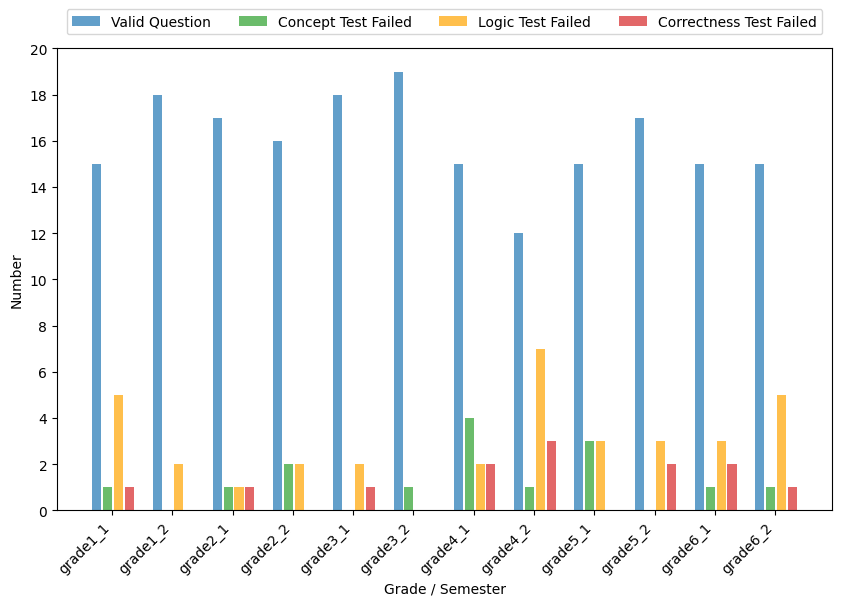

<Figure size 640x480 with 0 Axes>

In [20]:
data = read_csv('experiment/gen_total.csv')
print(len(data), data[0])
gen_data = parse_data(data[1:])
gen_plot(gen_data)